<center>
    <h1>Hypothesis Testing</h1>
    <h6>Author : Gaurav Padawe</h6>
</center>

**What is Hypothesis Testing ?**

- Its a statistical concept used in making decisions that are solely based on statistics.


- To conduct Hypothesis Test we need Normalized data, i.e, Gaussian Distribution (Normally distributed data).


<img src="https://www.ttested.com/gallery/thumbnails/generating-normal-random-variables-part-1.png">


- Normally distributed data has a **equal value** for the Measures of **Central Tendency (mean, median and mode)**


- We can also convert Normally Distributed Data to a Standard form wherein mean is 0 and standard deviation is 1. And that process of conversion is termed as Standardization.


<img src="https://www.mathsisfun.com/data/images/standardizing.svg">


- Normal distribution / Standardized distribution always has a shape of Bell after we visualize the data and hence we term it as **"Bell Curve".**


- We also call Normal Distribution as **Gaussian Distribution.**


- Some properties of Standard Normal distribution are as follows (Refer Image) :


<img src="https://www.leansixsigmadefinition.com/wp-content/uploads/2019/04/gaussian_distribution.png">


- To convert Normally distributed data to Standard Normal distribution we go according to the Formula Stated Below :


<img src='http://lrieber.coe.uga.edu/edit6900/resources/z_formula_large.gif?crop'>


- In this section we're going to deep dive into Hypothesis Testing using Python.


- Some of the topics we're going to explore are :


    - Null Hypothesis & Alternate Hypothesis
    - Significance Level
    - Types of Errors
    - One Sample T-test
    - Two-tailed test & One-tailed test
    - Levene's test
    - Two Sample T-test (Independent T-test)

In [1]:
#importing required libraries

import pandas as pd                                            #dataframes
import matplotlib.pyplot as plt                                #visuals
import seaborn as sns                                          #visuals
from scipy.stats import ttest_1samp, ttest_ind, levene         #statistical tests
import statsmodels.stats.api as sms                            #statistical tests

In [2]:
#reading dataset

df = pd.read_csv('C:/Users/Gaurav/Desktop/Files/DS/Retail Analytics/Sale Prediction/Train_Retail.csv')
df = df[(df['Item_Type'] == 'Dairy') & (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Supermarket Type1')]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
40,FDU02,13.350,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Small,Tier 1,Supermarket Type1,3435.5280
91,DRG27,8.895,Low Fat,0.105274,Dairy,39.9138,OUT049,1999,Medium,Tier 1,Supermarket Type1,690.4346
110,FDD03,13.300,Low Fat,0.079806,Dairy,232.5300,OUT046,1997,Small,Tier 1,Supermarket Type1,699.0900


- In here we've sales data from Supermakets of Type 1 in a Tier-1 city wherein we've Medium & Small sized retail outlets.


- We're specifically targetting dairy products.


- My initial assumption is that Medium & Small sized outlets from Tier-1 city are experiencing similar Sales of Dairy products. This the basis of our Hypothesis Test.


- Primary features in this case are **Outlet_Size** & **Item_Outlet_Sales**

In [3]:
#examining Missing values

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [4]:
#descriptive statistics

des_stat = df.groupby('Outlet_Size')['Item_Outlet_Sales'].describe()
des_stat

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
Medium,78.0,2303.599713,1404.915157,243.6828,1158.4920,1953.4572,3334.6593,7646.0472
Small,78.0,2244.693485,1587.949681,236.3590,1031.3242,1600.9161,3275.7360,7833.8028


- Above we can observe the distribution for both - Medium & Small sized Outlet Sales of Dairy Products.


- We can observe we've 78 records for each category - Medium & Small.


- Further, we can notice that the Mean of Medium sized outlet's sales is 2304 and its more than the average sales of Small sized outlet Sales.


- Another observation is Standard deviation of Dairy Sales in Small sized outlet is 1588 compared to Medium one's.


- Interestingly, Small sized outlet experienced Max. Dairy Sales at once.

In [5]:
#split the data

med_out = df[df.Outlet_Size == 'Medium'].sample(39, random_state=0)
small_out = df[df.Outlet_Size == 'Small'].sample(39, random_state=0)

- Above code splits the data by Categories - Medium & Small.


- From the data we pick 39 samples (50% of the categorized data) at Random.

Text(0.5, 1.0, 'Sample Distribution of Medium & Small Outlet Sales')

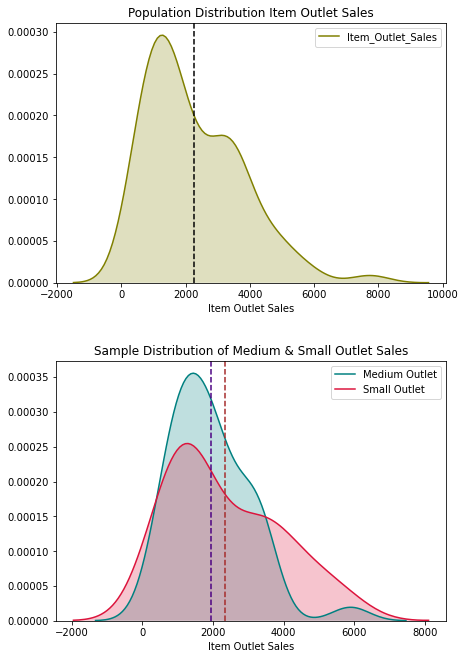

In [6]:
#Visualizing the spread of total sales over categories

#sns.set_context('talk')
plt.figure(figsize=(7,11))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
#sns.kdeplot(df[df.Outlet_Size == 'Medium'].iloc[:,-1], color='olive', shade=True)
#sns.kdeplot(df[df.Outlet_Size == 'Small'].iloc[:,-1], color='grey', shade=True)
sns.kdeplot(df.iloc[:,-1], color='olive', shade=True)
#plt.legend(['Medium Outlet','Small Outlet'])
#plt.axvline(des_stat.iloc[0, 1], color='green', linestyle='--')
plt.axvline(df.iloc[:,-1].mean(), color='black', linestyle='--')
plt.xlabel('Item Outlet Sales')
plt.title('Population Distribution Item Outlet Sales')

plt.subplot(2, 1, 2)
sns.kdeplot(med_out['Item_Outlet_Sales'], color='teal', shade=True)
sns.kdeplot(small_out['Item_Outlet_Sales'], color='crimson', shade=True)
plt.legend(['Medium Outlet','Small Outlet'])
plt.axvline(med_out.Item_Outlet_Sales.mean(), color='indigo', linestyle='--')
plt.axvline(small_out.Item_Outlet_Sales.mean(), color='brown', linestyle='--')
plt.xlabel('Item Outlet Sales')
plt.title('Sample Distribution of Medium & Small Outlet Sales')

- In above visuals we can observe the Spread of Population Sales and then we can observe spread of Sample sales.


- Both visuals are split by categories.


- In both visuals we can notice that the mean is between 1500 - 2500.

### Null and Alternate Hypothesis


- **Null Hypothesis :** Null hypothesis is our initial assumption. It is based on domain knowledge. E.g : Sample Mean = Population Mean, Average Sales every week is 100 USD.


- **Alternate Hypothesis :** Alternate hypothesis is opposite to Null hypothesis. E.g : Sample Mean ≠ Population Mean, Average sales every week is more/less than 100 USD.


### Level of Significance

- It is a threshold wherein we either accept or reject Null hypothesis.


- It is denoted by **Alpha (α)** and default value of it on a probablistic scale is **0.05 (5%).**


- If our p-Value is under 0.05 or 5% then we reject Null hypothesis in favor of Alternate hypothesis but if value is greater than or equals to 0.05 then we accept our Null hypothesis.


- In a way, accepting Null hypothesis meaning our initial assumption is right and it falls under the acceptance region of **95%**. Acceptance region is also known as **Confidence Interval** which has Lower and Upper limit.


<img src='https://miro.medium.com/max/484/1*UW92hOUSdgyUhSQH2YOwKQ.png'>

- In the image above we can see that there are 2 critical regions (in Grey) on either sides, i.e, Rejection region of 0.025% each. (Alpha / 2)


- While, in the middle we've Acceptance Region which comprises of 95%.


### Types of Errors


- **Type-I Error :** We reject the null hypothesis even when that hypothesis was true.


- **Type-II Error :** We accept the null hypothesis but it is false.


### One sample T- test

- This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean.


- **Note :** By default Scipy performs **Two-tailed test.**

#### Two-Tailed Test

- In Two-tailed test the critical / rejection region are on two sides. It tests wheather the sample mean is greater than or less than given Population mean or any value that belongs to Null hypothesis.


- We use Two-tailed test when we are unsure if value is greater or less than Specified value.


<img src="https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2018/11/t-test_two_tails_05.png?resize=576%2C384">

In [7]:
#Average values

pop_mean = df.Item_Outlet_Sales.mean()
med_out_mean = med_out.Item_Outlet_Sales.mean()
small_out_mean = small_out.Item_Outlet_Sales.mean()

print ('Population Mean of Sales : {:.2f}'.format(pop_mean), '\n')
print ('Sample Mean of Sales in Medium Outlet : {:.2f}'.format(med_out_mean), '\n')
print ('Sample Mean of Sales in Smaller Outlet : {:.2f}'.format(small_out_mean))

Population Mean of Sales : 2274.15 

Sample Mean of Sales in Medium Outlet : 1946.77 

Sample Mean of Sales in Smaller Outlet : 2352.03


#### Test Case - For Medium Sized Outlet


- We assume that Sample Mean of Dairy Sales in Medium Sized Outlet is equaling Population Mean which becomes our Null Hypothesis. Alternate Hypothesis is Opposite to our Initial assumption. 


    - Null Hypothesis (h_0) : x̄ = μ (Sample Mean = Population Mean)
    - Alternate Hypothesis (h_1) : x̄ ≠ μ (Sample Mean ≠ Population Mean)


- Level of Significance = 0.05 , i.e, 5%


- If p-value is less than 0.05 then we will reject null hypothesis in favor of Alternate hypothesis but if p-value is above 0.05 then we cannot reject null hypothesis.

In [8]:
## For Medium sized outlet sample dist

MO_1_samp_test = ttest_1samp(med_out['Item_Outlet_Sales'].values, pop_mean)

print ('Test Statistics : {:.4f}'.format(MO_1_samp_test.statistic))
print ('Alpha : ', 0.05)
print ('p-Value : {:.2f}'.format(MO_1_samp_test.pvalue))
print ('Confidence Interval Lower-Upper Range : ', sms.DescrStatsW(med_out['Item_Outlet_Sales']).tconfint_mean(), '\n')

if MO_1_samp_test.pvalue > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis ')

Test Statistics : -1.8230
Alpha :  0.05
p-Value : 0.08
Confidence Interval Lower-Upper Range :  (1583.2157287749649, 2310.3143840455477) 

Accept Null Hypothesis


- Looking at the above result since p-value is more than 5% we can reject Alternate Hypothesis in favor of Null Hypothesis, i.e, Sample Means = Population Mean.


- Now Let's see if our hypothesis is actually True 


    - Sample Mean = 1946.77
    - Population Mean = 2274.15
    
- Our Null hypothesis states that Sample Mean = Population Mean but we can see that it is not equal.


- We accept Null hypothesis since our Sample mean (1946.77) falls in the range of 95% acceptance zone (Confidence interval) which ranging from **1583 to 2310** and not in the Critical area on either side.


- Hence, we fail to reject Null hypothesis.

#### Test case - For Small Sized Outlet

- We assume similar hypothesis in this scenario too, i.e, Sample Mean of Sales in Small Sized Outlet is equaling Population Mean which is our Null Hypothesis. Alternate Hypothesis is Opposite to our Initial assumption.


    - Null Hypothesis (h_0) : x̄ = μ (Sample Mean = Population Mean)
    - Alternate Hypothesis (h_1) : x̄ ≠ μ (Sample Mean ≠ Population Mean)

In [9]:
## For Small sized outlet sample dist

SO_1_samp_test = ttest_1samp(small_out['Item_Outlet_Sales'].values, pop_mean)

print ('Test Statistics : {:.4f}'.format(SO_1_samp_test.statistic))
print ('Alpha : ', 0.05)
print ('p-Value : {:.2f}'.format(SO_1_samp_test.pvalue))
print ('Confidence Interval Lower-Upper Range : ', sms.DescrStatsW(small_out['Item_Outlet_Sales']).tconfint_mean(), '\n')

if SO_1_samp_test.pvalue > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis ')

Test Statistics : 0.3139
Alpha :  0.05
p-Value : 0.76
Confidence Interval Lower-Upper Range :  (1849.8092831561553, 2854.255506587434) 

Accept Null Hypothesis


- In this case as well, since p-value is more than 5% we can reject Alternate Hypothesis in favor of Null Hypothesis, i.e, Sample Means = Population Mean.


- Now Let's see if our hypothesis is actually True 


    - Sample Mean = 2352.03
    - Population Mean = 2274.15
    
- Our Null hypothesis states that Sample Mean = Population Mean but we can see that it is not equal.


- But we accept Null hypothesis since our Sample mean (2352.03) falls in the range of 95% acceptance zone (Confidence interval) which ranging from **1849 to 2854** and not in the Critical area on either side.


- Hence, we fail to reject Null hypothesis.

#### One Tailed Test

- One-tailed hypothesis tests are also known as directional and one-sided tests because you can test for effects in only one direction. 

#### Left Tailed Test


**For Medium Sized Outlet :**


- We assume that Sample mean of Sales of Medium Sized Retail Outlet is greater than equals to Population Mean 


    - Null Hypothesis (h_0) : x̄ >= μ (Sample Mean >= Population Mean)
    - Alternate Hypothesis (h_1) : x̄ < μ (Sample Mean < Population Mean)


- In such scenario, One tailed test comes into picture because it is a directional test , i.e, we're looking for critical region in either one of the direction (Left / Right).


- Direction Prediction : Since our Null hypothesis is claiming that **Sample mean >= Population mean** , i.e, We can assume that 95% we are confident that sample mean is greater than population mean but alternate hypothesis claims that **Sample mean < Population Mean**.


<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/11/t-test_left_tail_05.png?w=576&ssl=1"/>


- Above Image is representing the scenario which we assume in our case , i.e, **Left tailed test**.


- Considering Two-tailed test, we had already got p-value as 0.08 in **Test case - Medium Sized Outlet**. By default Scipy performs Two-tailed test so in order to get p-value for one-tailed we have to divide it by 2, i.e, 0.08 / 2 = 0.04


- Having 0.04 we know that 0.04 < 0.05 then we can reject Null hypothesis in favor of Alternate hypothesis.


- Now Let's see if our Alternate hypothesis is actually True


    - Sample Mean = 1946.77
    - Population Mean = 2274.15


- Our Null hypothesis states that Sample Mean >= Population Mean and we can see that it is False.


- Also, our Sample mean (1946.77) doesn't fall in the range of 95% acceptance zone (Confidence interval). In directional tests our acceptance region is region that is unshaded (Refer Image). Since, sample mean falls in critical region we go in favor of Alternate hypothesis. 


#### Right Tailed Test


**For Medium Sized Outlet :**


- In case, we have opposite scenario where :


    - Null Hypothesis (h_0) : x̄ <= μ (Sample Mean <= Population Mean)
    - Alternate Hypothesis (h_1) : x̄ > μ (Sample Mean > Population Mean)
    

- Direction Prediction : Since our Null hypothesis is claiming that **Sample mean <= Population mean** , i.e, we can assume that 95% we are confident that sample mean is equals to population mean but alternate hypothesis claims that **Sample mean > Population mean**.


<img src="https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2018/11/t-test_right_tail_05.png?w=576&ssl=1"/>


- Above Image is representing the scenario called **Right tailed test**.


- In **Left tailed test** we already got out p-value as 0.04. Since Right tailed test is in opposite direction we just have to subtract our left-tailed p-value by 1 in order to acquire right tailed p-value , i.e, 1 - 0.04 = 0.96. So our right tailed p-value is 0.96.


- Having 96% we can reject alternate hypothesis in favor of Null hypothesis. But let's perform fact check.


- Now Let's see if our Alternate hypothesis is actually True


    - Sample Mean = 1946.77
    - Population Mean = 2274.15


- Our Null hypothesis states that Sample Mean <= Population Mean and it is True.


- Hence, we are right in case of rejecting Alternate hypothesis.

### Two sample T- test

- In the two-sample test, we test the equality of means of two sample distributions against each other.


#### Test case - Levene's Test for Variance Equality check

- Before we conduct Two-tailed test we need to check if the variances of both the distributions are same. For that we need to perform Levene's test.


    - Null Hypothesis (h_0) : Variance of Medium Outlet Sales = Variance of Small sized outlet Sales
    - Alternate Hypothesis (h_1) : Variance of Medium Outlet Sales ≠ Variance of Small sized outlet Sales

In [21]:
#Levene's test to check whether the variances of the two group are same.

levene_test = levene(med_out['Item_Outlet_Sales'].values, small_out['Item_Outlet_Sales'], center='mean')

print ('Test Statistics : {:.4f}'.format(levene_test.statistic))
print ('Alpha : ', 0.05)
print ('p-Value : {:.5f}'.format(levene_test.pvalue), '\n')

if levene_test.pvalue > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis ')

Test Statistics : 8.4770
Alpha :  0.05
p-Value : 0.00472 

Reject Null Hypothesis 


- We can see above that p-value is slightly less than 0.05 so we reject Null hypothesis.


- By Levene's test we conclude that variances are not same.


- In Two-sample t-test we have parameter called "equal_var" which is True by default, but we'll set it as False as per Levene's test result.


#### Test case - Two-sample ttest

    - Null Hypothesis (h_0) : Mean of Medium sized Outlet Sales = Mean of Small sized Outlet Sales.
    - Alternate Hypothesis (h_1) : Mean of Medium sized Outlet Sales ≠ Mean of Small sized Outlet Sales.

In [25]:
#two-sample t-test

two_samp_ttest = ttest_ind(med_out['Item_Outlet_Sales'].values, small_out['Item_Outlet_Sales'], equal_var=False)

print ('Test Statistics : {:.4f}'.format(two_samp_ttest.statistic))
print ('Alpha : ', 0.05)
print ('p-Value : {:.2f}'.format(two_samp_ttest.pvalue), '\n')

if two_samp_ttest.pvalue > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis ')

Test Statistics : -1.3233
Alpha :  0.05
p-Value : 0.19 

Accept Null Hypothesis


- We've got p-value of 0.19 which indicates that Mean of Medium sized Outlet Sales = Mean of Small sized Outlet Sales. Hence, we go with Null Hypothesis.

### FAQ 

- **One-tailed test or Two-tailed test ?**

**Ans.:** It is solely based on problem statement. If you've been told to test weather the average sale is "greater" or "lower" then in such case you need to choose One-tailed test. But In case you're not sure if its "lower" or "greater" then choose Two-tailed test.